In [1]:
import gensim.downloader as api
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

In [2]:
# Load Word2Vec vectors trained on Google News
print("Loading model... this might take a minute.")
model = api.load("word2vec-google-news-300")
print("Model loaded!")

Loading model... this might take a minute.
[==================================================] 100.0% 1662.8/1662.8MB downloaded
Model loaded!


In [ ]:
# Task: Find similar words
print("Words similar to 'king':")
for word, score in model.most_similar('king', topn=5):
    print(f"{word}: {score:.4f}")

print("\n" + "-"*30 + "\n")

# Task: Perform Analogy (king - man + woman = ?)
analogy = model.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)
print(f"Analogy Result (king - man + woman): {analogy[0][0]}")

Words similar to 'king':
kings: 0.7138
queen: 0.6511
monarch: 0.6413
crown_prince: 0.6204
prince: 0.6160

------------------------------

Analogy Result (king - man + woman): queen


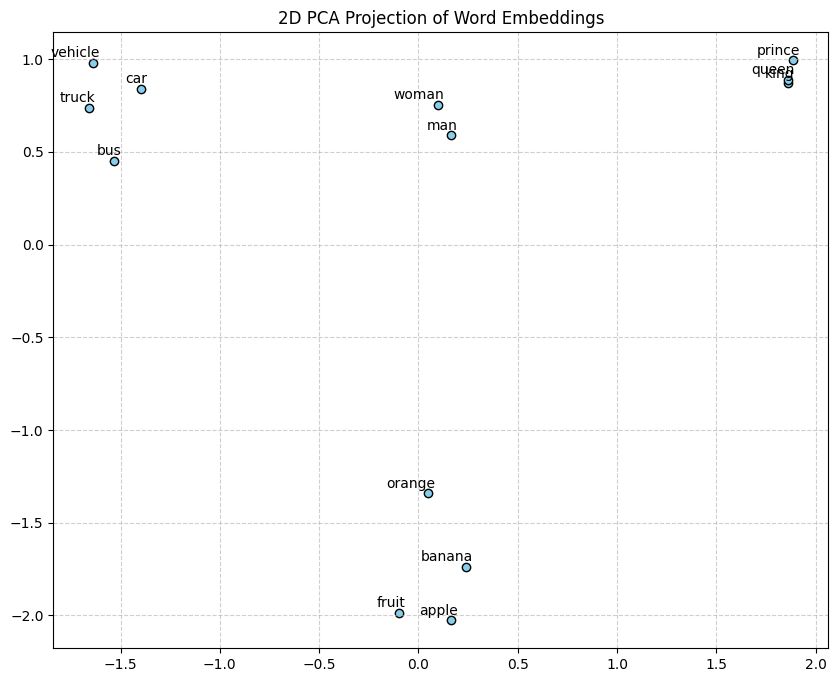

In [4]:
# 1. Define words to visualize
words_to_plot = [
    'king', 'queen', 'prince', 'man', 'woman', 
    'apple', 'orange', 'banana', 'fruit',
    'car', 'bus', 'truck', 'vehicle'
]

# 2. Extract vectors
word_vectors = np.array([model[w] for w in words_to_plot])

# 3. Reduce dimensions from 300 to 2 using PCA
pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors)

# 4. Create the plot
plt.figure(figsize=(10, 8))
plt.scatter(result[:, 0], result[:, 1], edgecolors='k', c='skyblue')

# Label each point
for i, word in enumerate(words_to_plot):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]), xytext=(5, 2), 
                 textcoords='offset points', ha='right', va='bottom')

plt.title("2D PCA Projection of Word Embeddings")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()